# k-mean clustering

files needed = ('iris.csv', 'wi_mn_counties.csv')

In the last notebook we looked at the *classifier problem*. We knew what species a flower could be and we built a model to predict which species an observation was based on its characteristics. 

In this notebook we look at the *clustering problem*. In the clustering problem, we do not know how many species there are! Instead we try to group observations together in clusters based on how similar the observations are. 

You might use clustering to analyze a market (which customers are similar?), to sniff out bots on twitter, to find blocks of voters that might be on the fence, or to group incoming freshman into dorms. 


In [1]:
import pandas as pd
import sklearn.cluster
import matplotlib.pyplot as plt
import seaborn as sns

Let's return to the iris data. We can cluster on many characteristics, but if we use only two, we can visualize them in a scatter plot. Let's use the petal measurements. 

We are going to pretend that we do not know the species of each observation. We will use the species information later to see how well the cluster method worked.

In [2]:
iris = pd.read_csv('iris.csv')
iris.head(1)

sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa

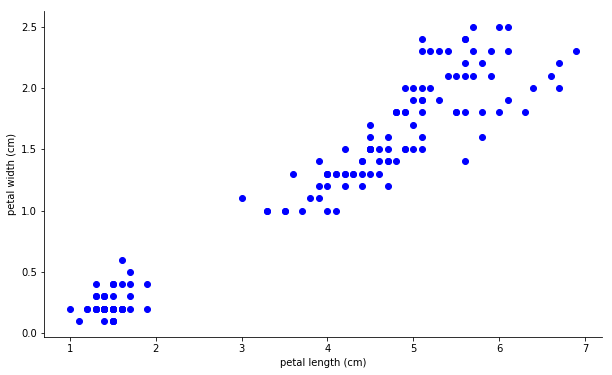

In [3]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(iris['petal length'], iris['petal width'], color='blue')

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

sns.despine()

plt.show()

Notice that I made all the dots the same color. I am pretending that I do now know which species each dot belongs to. In fact, I am pretending that I do not even know how many species there are. 

I see two distinct blobs. Let's guess that there are two clusters (k=2) in this data and estimate the model.

Like we saw in the classifier problem, we need numpy arrays to work with sklearn. Below, I convert the two characteristics to numpy arrays.

In [5]:
X = iris[['petal width', 'petal length']].to_numpy()


Now we estimate the model by fining the centers of the clusters. It works (roughly) by

1. Choosing a center for each cluster. 
2. Computing, for each cluster, the average distance from the center to each point in the cluster.

The algorithm varies the location of the the cluster centers until it has minimized the average distance from the center of the clusters to their members. 

In [6]:
# The random_state option ensures we all get the same answer.
kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(X)

The object returned from the model contains (among other things) the coordinates of the centers. They are numpy arrays. I will convert them to a dataframe. 

In [8]:
kmeans.cluster_centers_

array([[0.26078431, 1.49411765],
       [1.68181818, 4.92525253]])

In [9]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['y', 'x'])
centers

y         x
0  0.260784  1.494118
1  1.681818  4.925253

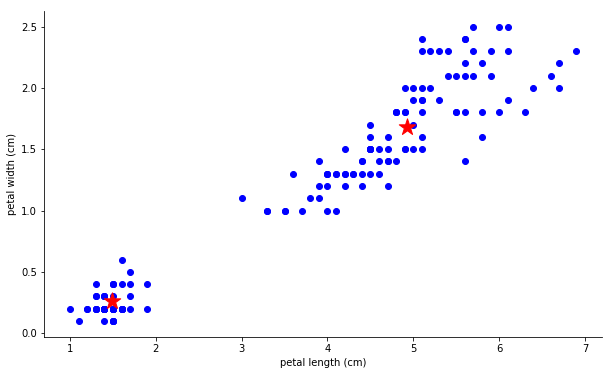

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(iris['petal length'], iris['petal width'], color='blue')
ax.scatter(centers['x'], centers['y'], color='red', s=300, marker='*')

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

sns.despine()

plt.show()

This is about what I expected from 'eyeballing' it. 

We know that there are three types of irises in the data set. Let's try 3 clusters. 

In [11]:
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(X)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['y', 'x'])
centers

y         x
0  0.244000  1.464000
1  2.037500  5.595833
2  1.342308  4.269231

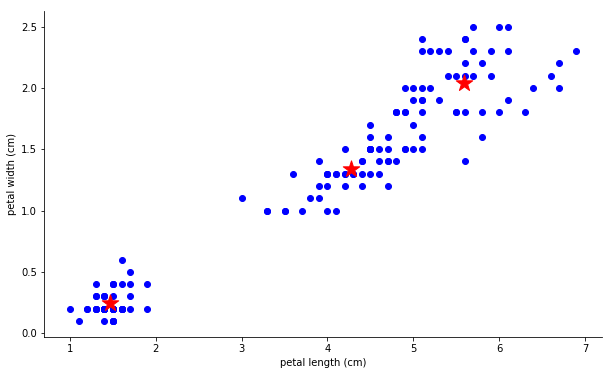

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(iris['petal length'], iris['petal width'], color='blue')
ax.scatter(centers['x'], centers['y'], color='red', s=300, marker='*')

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

sns.despine()

plt.show()

Do these three centers make sense? Let's grab the predicted values (the `labels`) for each data point and plot them. Then I will merge them onto the original DataFrame. 

In [13]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
pred = pd.DataFrame(kmeans.labels_, columns=['predicted'])
iris = pd.merge(left=pred, right=iris, left_index=True, right_index=True)

In [15]:
iris.head(10)

predicted  sepal length  sepal width  petal length  petal width  \
0          0           5.1          3.5           1.4          0.2   
1          0           4.9          3.0           1.4          0.2   
2          0           4.7          3.2           1.3          0.2   
3          0           4.6          3.1           1.5          0.2   
4          0           5.0          3.6           1.4          0.2   
5          0           5.4          3.9           1.7          0.4   
6          0           4.6          3.4           1.4          0.3   
7          0           5.0          3.4           1.5          0.2   
8          0           4.4          2.9           1.4          0.2   
9          0           4.9          3.1           1.5          0.1   

       species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  
5  Iris-setosa  
6  Iris-setosa  
7  Iris-setosa  
8  Iris-setosa  
9  Iris-setosa

The algorithm labels the cluster 0, 1, and 2. Let's give them reasonable names. 

In [16]:
iris['predicted'] = iris['predicted'].replace({0:'setosa', 1:'versicolor', 2:'virginica'})
iris.head()

predicted  sepal length  sepal width  petal length  petal width      species
0    setosa           5.1          3.5           1.4          0.2  Iris-setosa
1    setosa           4.9          3.0           1.4          0.2  Iris-setosa
2    setosa           4.7          3.2           1.3          0.2  Iris-setosa
3    setosa           4.6          3.1           1.5          0.2  Iris-setosa
4    setosa           5.0          3.6           1.4          0.2  Iris-setosa

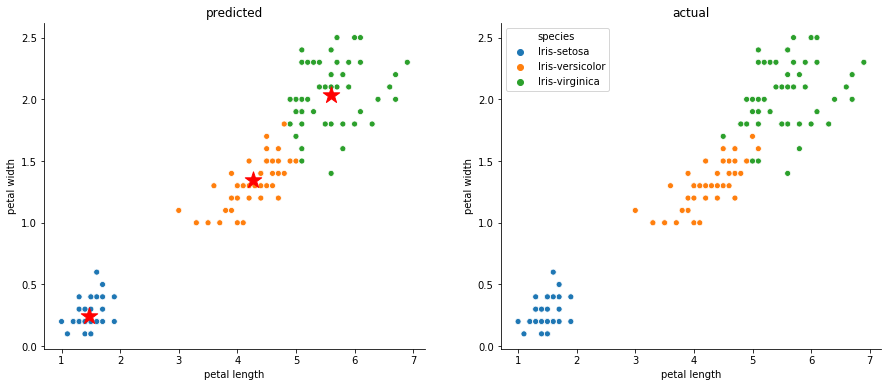

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15,6))


g = sns.scatterplot(ax=ax[0], x='petal length', y='petal width', hue='predicted', data=iris)
g.legend_.remove()

g = sns.scatterplot(ax=ax[1], x='petal length', y='petal width', hue='species', data=iris)

ax[0].scatter(centers['x'], centers['y'], color='red', s=300, marker='*')

ax[0].set_title('predicted')
ax[1].set_title('actual')


sns.despine(ax=ax[0])
sns.despine(ax=ax[1])

plt.show()

The algorithm does a good job. The setosa cluster is perfect &mdash; which is not surprising. The split between the other two types is decent, but not perfect. 

## How many clusters? The elbow graph.

When I looked at the data and pretended that I did not know how many species there were, I thought there were two clusters. When I added a third, it did a pretty good job matching the data. 

But the whole point of these models is that we **do not know how many clusters there are.** So how do we pick the number of clusters? 

The short answer: Try a bunch as see what happens. 

We can loop over the number of clusters and keep track of the sum of squared distance between the cluster centers and the members of the clusters.

In [18]:
kmeans.inertia_

31.38775897435898

In [19]:
y=[]
for n in range(1,8):
    kmeans = sklearn.cluster.KMeans(n_clusters=n, random_state=0).fit(X)
    y.append(kmeans.inertia_)
    
y

[550.6434666666667,
 86.40394533571003,
 31.38775897435898,
 19.48238901098901,
 13.933308757908758,
 11.089786452241711,
 9.337790756302523]

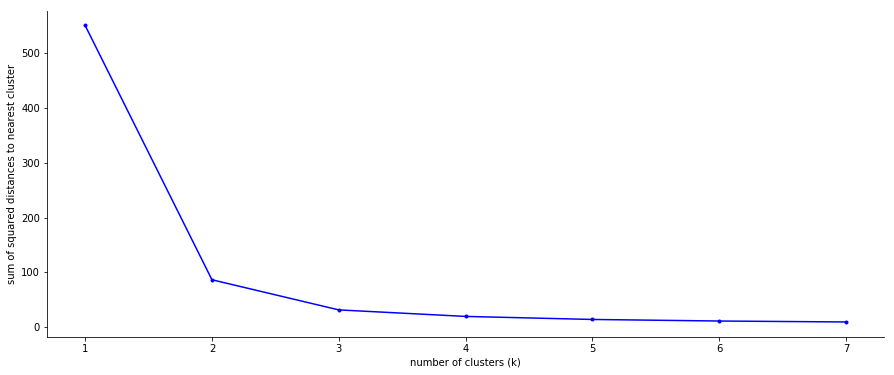

In [20]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(range(1,8), y, color='blue', marker='.')

ax.set_xlabel('number of clusters (k)')

ax.set_ylabel('sum of squared distances to nearest cluster')

sns.despine(ax=ax)

We see that moving from 1 to 2 clusters made a big improvement. ML people call this the "elbow" of the graph because the figure looks like an arm, I guess. Moving from 2 to 3 clusters made less of an improvement.

We can always lower the sum of squared distance (ssd) by increasing k. When k is the same as the number of observations, then each cluster has exactly one observation in it and the ssd is zero. But that isn't very helpful. As economists, we would say that there are diminishing returns to k. 

From this figure, I would choose either k=2 or k=3. After that, we do not get much improvement in the ssd. 

## Practice

Which Minnesota counties are similar to which Wisconsin counties? Perhaps your company has spent a lot of money researching Wisconsin as a marketplace. Now it wants to expand into Minnesota. Can we find counties in Minnesota that are similar to counties in Wisconsin? Let's use our clustering model to see. 

1. Load the file 'wi_mn_counties.csv'.

The variables are 

* `income` in thousands of USD, for 2018
* `population` number of persons, for 2018
* `ALAND` area of the county in square meters


In [21]:
counties = pd.read_csv('wi_mn_counties.csv')
counties.head(1)

GEOID Description    income      pop       ALAND
0  27001  Aitkin, MN  632584.0  15902.0  4718433597

2. Create an income per capita variable: income/pop
3. Create a density variable: pop/(ALAND/1000000)

Dividing `ALAND` by 1,000,000 makes the unit people per square kilometer

In [22]:
counties['density'] = counties['pop']/(counties['ALAND']/1000000)
counties['income_cap'] = counties['income']/counties['pop']

counties.head(1)

GEOID Description    income      pop       ALAND   density  income_cap
0  27001  Aitkin, MN  632584.0  15902.0  4718433597  3.370186   39.780153

4. Make a scatter plot of income and density. Do you see a relationship? Would a linear model be helpful here?

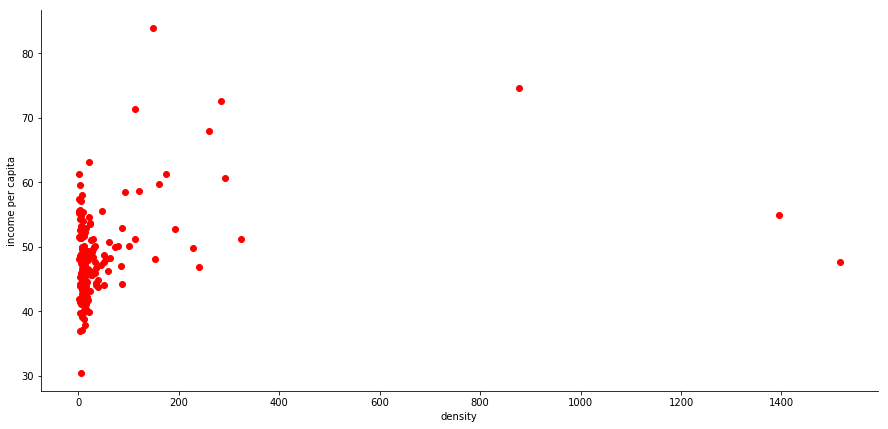

In [25]:
# I do not see an obvious linear relationship. There are two points to the far
# right look like they are similar. There is a mass of points around zero. 
# Wisconsin and Minnesota are pretty spread out! (Which I like.)


fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(counties['density'], counties['income_cap'], color='red')

ax.set_xlabel('density')
ax.set_ylabel('income per capita')

sns.despine(ax=ax)
plt.show()

5. Compute the elbow graph using `density` and `income_cap` as the variables. Try 1 through 10 possible clusters. 

Remember, you need to convert your DataFrame data to numpy areas. 

In [26]:
# Convert to numpy
X = counties[['density', 'income_cap']].to_numpy()

In [27]:
# Try the model with 1, 2, ...10 clusters. Keep track of the ssd ('inertia')
y=[]
for n in range(1, 11):
    kmeans = sklearn.cluster.KMeans(n_clusters=n, random_state=0).fit(X)
    y.append(kmeans.inertia_)

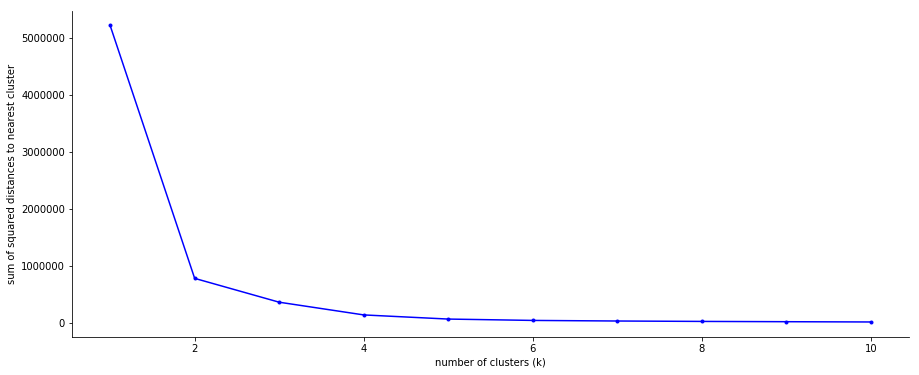

In [28]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(range(1,11), y, color='blue', marker='.')

ax.set_xlabel('number of clusters (k)')

ax.set_ylabel('sum of squared distances to nearest cluster')

sns.despine(ax=ax)

5. Based on your elbow graph, how many clusters seem appropriate?

In [ ]:
# It looks like 3 clusters is reasonble. 

Let's explore our results some more. 

6. Run the kmeans model with k=3
7. Retrieve the `labels_` from the results
8. Merge the labels onto your original DataFrame, using the index as the merge key

In [29]:
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(X)
clusters = pd.DataFrame(kmeans.labels_, columns=['cluster'])
detail = pd.merge(left=counties, right=clusters, left_index=True, right_index=True)
detail.head(2)

GEOID Description      income       pop       ALAND     density  \
0  27001  Aitkin, MN    632584.0   15902.0  4718433597    3.370186   
1  27003   Anoka, MN  18135923.0  353813.0  1092919450  323.732001   

   income_cap  cluster  
0   39.780153        0  
1   51.258498        2

9. Plot income_cap and density again. Use seaborn's scatterplot and set the hue to the `labels_` you retrieved.  What patterns do you see?

You might add labels to the points so you can tell which counties are which. 

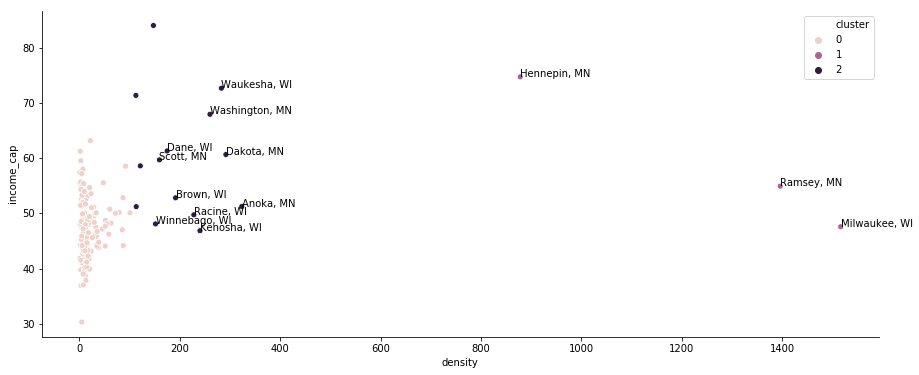

In [31]:
fig, ax = plt.subplots(figsize=(15,6))


g = sns.scatterplot(ax=ax, x='density', y='income_cap', hue='cluster', data=detail)

for x,y,t in zip(detail['density'], detail['income_cap'], detail['Description']):
    if x > 150:
        ax.text(x, y, t)

sns.despine(ax=ax)

plt.show()

10. Redo question 9, but with k=4. How do the results change?

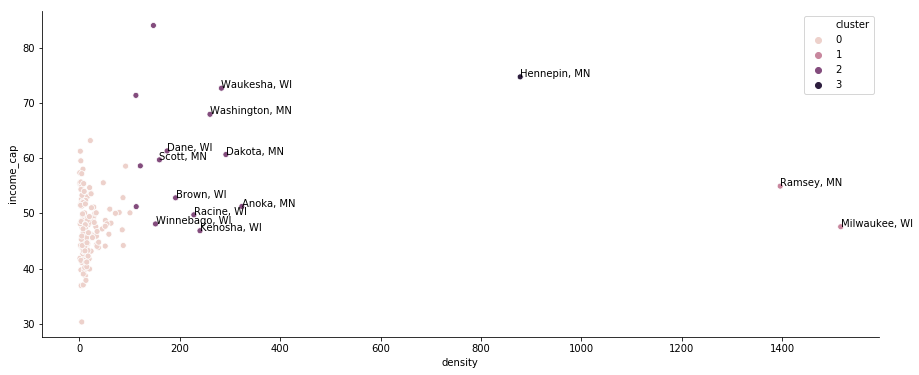

In [34]:
# Hennepin, MN becomes its own cluster. 

kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(X)
clusters = pd.DataFrame(kmeans.labels_, columns=['cluster'])
detail = pd.merge(left=counties, right=clusters, left_index=True, right_index=True)
detail.head(2)

fig, ax = plt.subplots(figsize=(15,6))


g = sns.scatterplot(ax=ax, x='density', y='income_cap', hue='cluster', data=detail)

for x,y,t in zip(detail['density'], detail['income_cap'], detail['Description']):
    if x > 150:
        ax.text(x, y, t)

sns.despine(ax=ax)

plt.show()